In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
import warnings
warnings.simplefilter(action='ignore')

## Lecture 11

## `join()` vs `with_column()`

### Example 1: Sections

In [2]:
sections = Table().with_columns('Section No', [1,2,3,4,5,6], 
                                'Room', ['PHELP 1445', 'NH 1111', 'NH 1109', 'ARTS 1349', 'PHELP 2514', 'PHELP 2514'])
sections

Section No,Room
1,PHELP 1445
2,NH 1111
3,NH 1109
4,ARTS 1349
5,PHELP 2514
6,PHELP 2514


In [3]:
tas = ['Steven', 'Danish', 'Aman', 'Christos', 'Vanessa', 'Sean']
sections.with_column('tas', tas)

Section No,Room,tas
1,PHELP 1445,Steven
2,NH 1111,Danish
3,NH 1109,Aman
4,ARTS 1349,Christos
5,PHELP 2514,Vanessa
6,PHELP 2514,Sean


In [4]:
rooms = ['PHELP 1445', 'NH 1111', 'NH 1109', 'ARTS 1349', 'PHELP 2514']
url = []
capacity = [35, 48, 35, 43, 35]
renovation = [2018, 2017, 2018, 2018, 2018]
rooms = Table().with_columns('room', rooms, 'capacity', capacity, 'renovated', renovation)
rooms

room,capacity,renovated
PHELP 1445,35,2018
NH 1111,48,2017
NH 1109,35,2018
ARTS 1349,43,2018
PHELP 2514,35,2018


In [5]:
sections.join('Room', rooms, 'room').sort('Section No')

Room,Section No,capacity,renovated
PHELP 1445,1,35,2018
NH 1111,2,48,2017
NH 1109,3,35,2018
ARTS 1349,4,43,2018
PHELP 2514,5,35,2018
PHELP 2514,6,35,2018


### Example 2: Flights

In [6]:
def distance(lat1, lon1, lat2, lon2):
    # Haversine Formula for great-circle distances
    r_earth = 4000 #miles
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(lon1)
    lat2 = np.deg2rad(lat2)
    lon2 = np.deg2rad(lon2)
    
    distance = np.arccos(np.sin(lat1)*np.sin(lat2) + np.cos(lat1)*np.cos(lat2)*np.cos(lon2-lon1)) * r_earth
    return distance

In [7]:
flights = Table.read_table('data/flights.csv').select('carrier', 'flight', 'origin', 'air_time', 'dest')
airports = Table.read_table('data/airports.csv').select('faa', 'lat', 'lon')

**Tasks**
We want to get the distribution of the airspeeds

- join the airports with the flight data to get location information about origin and destination location
    - We need to join the airport table twice; 
    - therefore we should create two copies of the airports table with distinct labels
- apply the havesine formula to get an approximation of the distances between origin and destinations
- calculate the speed
- create a histogram

In [8]:
airports_origin = airports.relabeled('lat', 'lat_o').relabeled('lon', 'lon_o')
airports_dest = airports.relabeled('lat', 'lat_d').relabeled('lon', 'lon_d')

In [9]:
flights = flights.join('origin', airports_origin, 'faa')
flights = flights.join('dest', airports_dest, 'faa')

In [11]:
dist = flights.apply(distance, 'lat_o', 'lon_o', 'lat_d', 'lon_d')
flights = flights.with_column('distance', dist)

In [12]:
speed = flights.column('distance') / flights.column('air_time')*60
flights = flights.with_column('speed', speed)

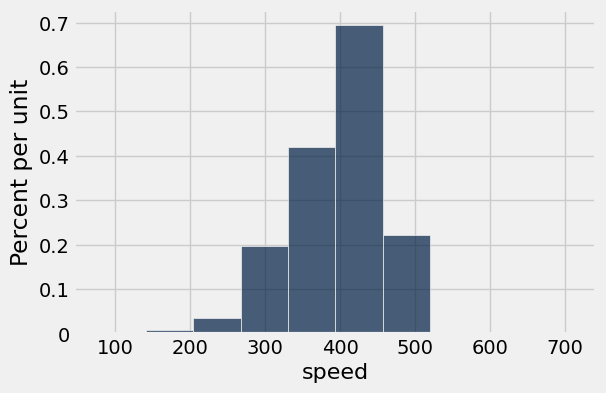

In [13]:
flights.hist('speed')

---
Back to slides

---

## Bike Sharing ##

In [14]:
trip = Table.read_table('data/trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


## Distribution of Durations ##

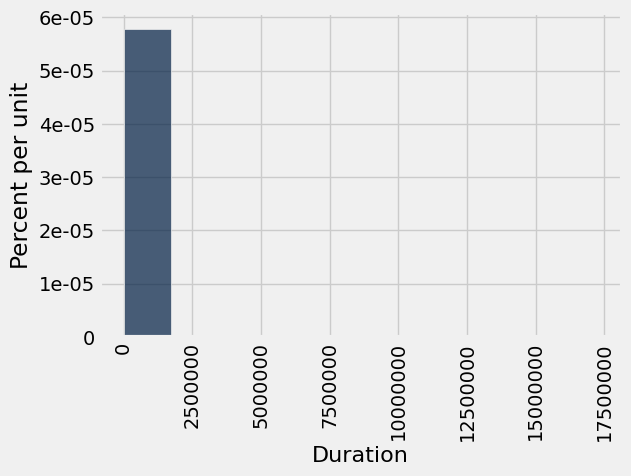

In [15]:
trip.hist('Duration')

In [16]:
trip.sort('Duration', descending=True)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
568474,17270400,12/6/2014 21:59,South Van Ness at Market,66,6/24/2015 20:18,2nd at Folsom,62,535,Customer,95531
825850,2137000,6/28/2015 21:50,Market at Sansome,77,7/23/2015 15:27,Yerba Buena Center of the Arts (3rd @ Howard),68,466,Customer,97213
750192,1852590,5/2/2015 6:17,San Antonio Shopping Center,31,5/23/2015 16:53,Castro Street and El Camino Real,32,680,Subscriber,94024
841176,1133540,7/10/2015 10:35,University and Emerson,35,7/23/2015 13:27,University and Emerson,35,262,Customer,94306
522337,720454,10/30/2014 8:29,Redwood City Caltrain Station,22,11/7/2014 15:36,Stanford in Redwood City,25,692,Customer,94010
774999,688899,5/20/2015 15:27,Palo Alto Caltrain Station,34,5/28/2015 14:49,California Ave Caltrain Station,36,230,Customer,nil
635260,655939,2/8/2015 3:05,San Jose Civic Center,3,2/15/2015 17:17,SJSU 4th at San Carlos,12,132,Customer,89451
745640,611240,4/29/2015 9:41,University and Emerson,35,5/6/2015 11:28,San Antonio Shopping Center,31,196,Customer,81
635263,602338,2/8/2015 3:09,San Jose Civic Center,3,2/15/2015 2:28,San Jose Civic Center,3,9,Customer,89451
779645,594550,5/24/2015 13:33,San Pedro Square,6,5/31/2015 10:42,San Pedro Square,6,39,Customer,95118


**Task** 
- Let's find trips that were shorter than 30 minutes and create a histogram of those
- Let's set the bins to 5 minute bins and add a unit

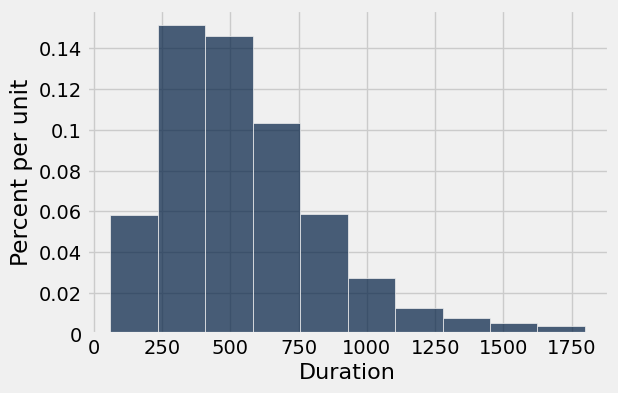

In [17]:
commute = trip.where('Duration', are.below(1800))
commute.hist('Duration')

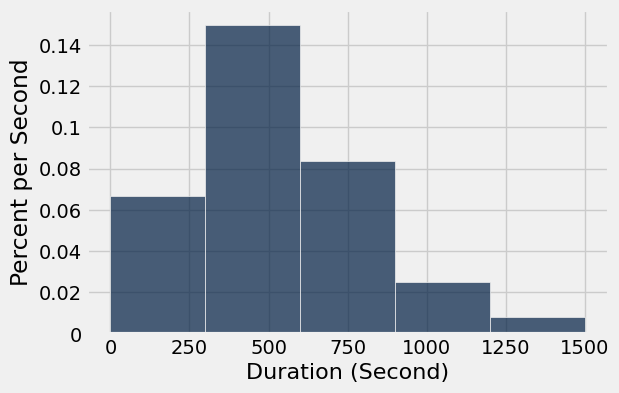

In [18]:
commute.hist('Duration', bins=np.arange(0, 1800, 300), unit='Second')

**Question**
What share of trips was between 5 and 10 minutes?
- eyeball from reading the histogram
- find the exact value (using table functions)

In [19]:
# Eyeball:
(600-300) * 0.15 

45.0

In [20]:
# Exact:
commute.where('Duration', are.between(300, 600)).num_rows / commute.num_rows *100

44.279621567462605

**Task**
- let's set the bins to 60

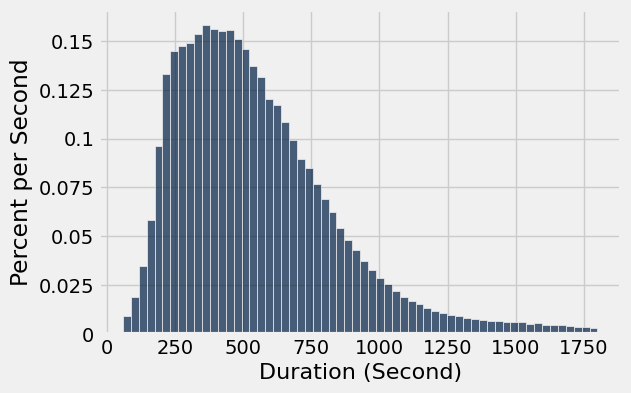

In [21]:
commute.hist('Duration', bins=60, unit='Second')

## Start and End Stations 
- How many (start) stations are there
- let's find the most common start station

In [26]:
# All distinct start stations Most common start station 
starts = commute.group('Start Station')
starts = commute.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


**Tasks**

let's
- find the count of trips between each station combination
    - Why do we have a trip count of 0 for some of the combinations?
    - Is it plausible that there are trips that start and stop at the same station? 
- find the average trip time between each station
    - The average might be skewed by people taking a long time because they e.g. got food on the way. 
    - How could we find the typical trip time between each station? Or maybe the fastest?

**Question:** Should we use `group()` or `pivot()`?

In [23]:
# Numbers of trips between stations
commute.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
# Average durations of trips between stations
commute.pivot('Start Station', 'End Station', values='Duration', collect=np.average)

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,702.13,253.874,309.087,418.065,0,0,424.15,740.714,0,0,668.886,516.897,495.519,0,862.889,388.117,493.469,1114.71,818.429,0,0,825,662.933,500.44,254.245,0,0,728.627,435.947,291.076,378.576,0,0,0,0,0,0,380.083,541.926,518.011,0,0,0,0,0,0,0,0,0,469.137,484.382,1037,0,0,0,0,0,0,0,0,836.684,365.579,0,0,575.923,250.553,646.038,0,617,386.032
2nd at South Park,196.085,618.116,237.366,507.394,0,0,450.279,715.247,0,0,900.679,589.368,612.456,0,640.081,317.625,404.27,940.253,648.948,0,0,732.632,815.671,501.608,230.486,0,0,834.396,513.307,323.982,423.605,0,0,0,0,0,0,328.813,616.429,567.77,0,0,0,0,0,0,0,0,0,281.635,349.079,780.958,0,0,0,0,0,0,0,0,831.879,359.105,0,0,490.479,356.287,473.056,0,722.063,395.474
2nd at Townsend,293.874,281.344,787.314,655.196,0,0,531.243,759.451,0,0,846.888,773.72,803.345,0,691.054,363.294,465.685,926.796,819.772,0,0,1070.59,919.073,609.987,371.105,0,0,877.591,731.92,506.895,673.452,0,0,0,0,0,0,666.625,865.7,776.333,0,0,0,0,0,0,0,0,0,262.334,310.047,985.214,0,0,0,0,0,0,0,0,1102.06,404.522,0,0,543.83,420.519,480.285,0,1092.67,585.169
5th at Howard,381.274,573.729,613.514,718.096,0,0,611.797,808.077,0,0,379.35,668.697,542.512,0,730.4,666.965,613.49,1056.59,952.167,0,0,469.741,834.692,676.55,281.975,0,0,449.548,295.297,414.857,545.6,0,0,0,0,0,0,410.043,255.956,357.799,0,0,0,0,0,0,0,0,0,434.022,386.263,605.708,0,0,0,0,0,0,0,0,553.362,584.98,0,0,662.308,406.225,546.84,0,972.07,206.704
Adobe on Almaden,0,0,0,0,462,583.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,942.176,616,0,0,0,0,0,0,0,0,0,463.92,0,0,0,0,0,0,0,639.857,858.571,534.438,0,0,0,0,0,546.316,399.435,292.702,0,360.4,684,1164.4,251.9,0,0,516.857,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,540.286,948.844,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,955.312,952.6,0,0,0,0,0,0,0,0,0,706.762,0,0,0,0,0,0,0,684.917,902.333,965,0,0,0,0,0,536.667,782.1,778,0,373.393,1127.92,1222.24,219.985,0,0,645,0,0,0,0,0,0,0
Beale at Market,360.701,603.873,685.934,625,0,0,720.932,282.033,0,0,627.423,273.973,303.168,0,232.777,441.483,300.5,498.2,352.467,0,0,697.074,416.986,465.877,329.5,0,0,731.175,386.292,217.528,350.115,0,0,0,0,0,0,340.857,502.335,374.793,0,0,0,0,0,0,0,0,0,783.228,792.387,809.92,0,0,0,0,0,0,0,0,781.634,301.297,0,0,438.75,207.94,953.429,0,465.688,444.689
Broadway St at Battery St,613.672,826.899,719.695,931.891,0,0,331.727,688.682,0,0,94

- How can we find the fastest trip ever between each pair of stations?

## Discussion question
Find the 5 stations closest to Civic Center BART by minimum trip time.

Things you need to do:
- find all the trips that start at `Civic Center BART (7th at Market)`
- find the shortest trip between stations
- optionally, subset the dataset to only the relevant columns

In [29]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [30]:
shortest = duration.group(['Start Station', 'End Station'], min)
shortest

Start Station,End Station,Duration min
2nd at Folsom,2nd at Folsom,61
2nd at Folsom,2nd at South Park,61
2nd at Folsom,2nd at Townsend,137
2nd at Folsom,5th at Howard,215
2nd at Folsom,Beale at Market,219
2nd at Folsom,Broadway St at Battery St,351
2nd at Folsom,Civic Center BART (7th at Market),456
2nd at Folsom,Clay at Battery,272
2nd at Folsom,Commercial at Montgomery,275
2nd at Folsom,Davis at Jackson,396


In [31]:
from_cc = shortest.where('Start Station', are.containing('Civic Center BART'))
from_cc = from_cc.sort('Duration min')
from_cc.take(np.arange(5))

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151


## Maps 
Geographical data on the stations


In [32]:
stations = Table.read_table('data/station.csv').drop(4, 6)
stations

station_id,name,lat,long,landmark
2,San Jose Diridon Caltrain Station,37.3297,-121.902,San Jose
3,San Jose Civic Center,37.3307,-121.889,San Jose
4,Santa Clara at Almaden,37.334,-121.895,San Jose
5,Adobe on Almaden,37.3314,-121.893,San Jose
6,San Pedro Square,37.3367,-121.894,San Jose
7,Paseo de San Antonio,37.3338,-121.887,San Jose
8,San Salvador at 1st,37.3302,-121.886,San Jose
9,Japantown,37.3487,-121.895,San Jose
10,San Jose City Hall,37.3374,-121.887,San Jose
11,MLK Library,37.3359,-121.886,San Jose


In [33]:
sf_stations = stations.where('landmark', are.equal_to('San Francisco'))
sf_stations_map_data = (sf_stations.select('lat', 'long', 'name').relabeled('name', 'labels'))
sf_stations_map_data.show(3)

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery


In [34]:
Marker.map_table(sf_stations_map_data)

In [35]:
Circle.map_table(sf_stations_map_data)

### Discussion question

Map all stations within 4 minutes (minimum ride time) of Civic Center.

In [36]:
close_cc = from_cc.where('Duration min', are.below(4 * 60))
close_cc

Start Station,End Station,Duration min
Civic Center BART (7th at Market),Civic Center BART (7th at Market),60
Civic Center BART (7th at Market),Powell Street BART,97
Civic Center BART (7th at Market),Market at 10th,104
Civic Center BART (7th at Market),Golden Gate at Polk,141
Civic Center BART (7th at Market),San Francisco City Hall,151
Civic Center BART (7th at Market),Market at 4th,164
Civic Center BART (7th at Market),5th at Howard,179
Civic Center BART (7th at Market),South Van Ness at Market,199


In [37]:
sf_stations_map_data

lat,long,labels
37.795,-122.4,Clay at Battery
37.7973,-122.398,Davis at Jackson
37.7942,-122.403,Commercial at Montgomery
37.7954,-122.405,Washington at Kearney
37.789,-122.403,Post at Kearney
37.8,-122.399,Embarcadero at Vallejo
37.7903,-122.391,Spear at Folsom
37.7954,-122.394,Harry Bridges Plaza (Ferry Building)
37.7915,-122.391,Embarcadero at Folsom
37.7839,-122.408,Powell Street BART


In [38]:
joined = sf_stations_map_data.join('labels', close_cc, 'End Station')
joined

labels,lat,long,Start Station,Duration min
5th at Howard,37.7818,-122.405,Civic Center BART (7th at Market),179
Civic Center BART (7th at Market),37.781,-122.412,Civic Center BART (7th at Market),60
Golden Gate at Polk,37.7813,-122.419,Civic Center BART (7th at Market),141
Market at 10th,37.7766,-122.417,Civic Center BART (7th at Market),104
Market at 4th,37.7863,-122.405,Civic Center BART (7th at Market),164
Powell Street BART,37.7839,-122.408,Civic Center BART (7th at Market),97
San Francisco City Hall,37.7786,-122.418,Civic Center BART (7th at Market),151
South Van Ness at Market,37.7748,-122.419,Civic Center BART (7th at Market),199


In [39]:
Marker.map_table(joined.select('lat', 'long', 'labels'))

## Example Questions

For each of the following, write a Python expression that returns the given data:

1. The name of the station where most rentals ended
2. The number of stations for which the average duration of trips ending at that station was more than 10 minutes
3. The number of stations that have more than 500 starts and more than 500 ends.